# Image Classification using CNNs

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import pathlib 
import PIL
import cv2

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

plt.style.use('ggplot')

### Load in Data

In [2]:
data_dir = pathlib.Path("input/Training_data/")

In [3]:
# Get the number of images
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

600


### Preview Images

In [4]:
# Set path for image classes
driving_license = list(data_dir.glob('driving_license/*'))
social_security = list(data_dir.glob('social_security/*'))
others = list(data_dir.glob('others/*'))

str(driving_license[0])

'input/Training_data/driving_license/63.jpg'

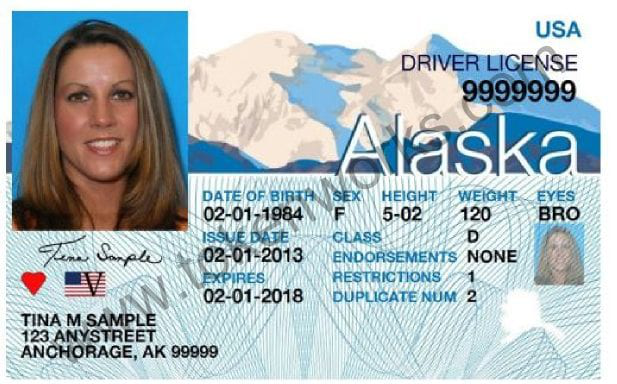

In [5]:
# Preview an image
PIL.Image.open(str(driving_license[12]))

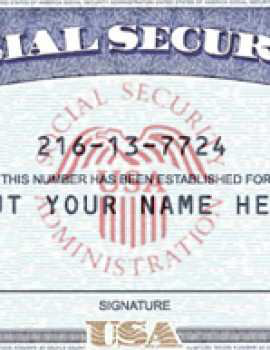

In [6]:
PIL.Image.open(str(social_security[1]))

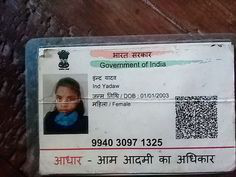

In [7]:
PIL.Image.open(str(others[145]))

In [8]:
# Explore using opencv

# img_color = cv2.imread(str(driving_license[12]),cv2.IMREAD_COLOR)
# cv2.imshow('color image',img_color)  
# cv2.waitKey(0)  
# cv2.destroyAllWindows() 

<AxesSubplot: ylabel='count'>

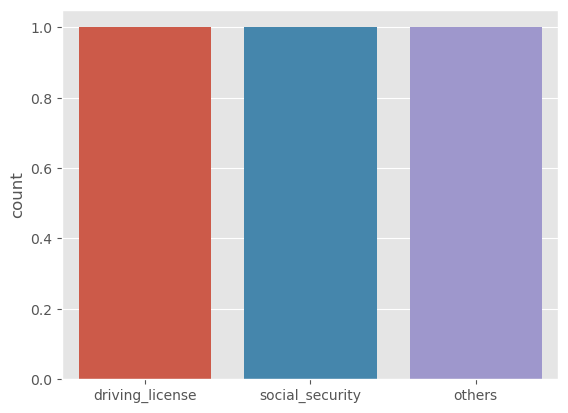

In [9]:
# Display count of each class 
dict_ = {
    "driving_license": len(driving_license),
    "social_security": len(social_security),
    "others": len(others)
}

df = pd.DataFrame([dict_])

sns.countplot(df)

### Load Data and Create Batches using `ImageDataGenerator()`

In [10]:
# Declare Variables
batch_size = 32
img_height = 180
img_width = 180

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=.20)

train_generator = train_datagen.flow_from_directory(
    directory=data_dir,
    subset="training",
    class_mode='sparse',
    target_size=(img_height, img_width),
    shuffle=True,
    batch_size=batch_size)


valid_datagen = ImageDataGenerator(rescale=1./255, validation_split=.20)

valid_generator = valid_datagen.flow_from_directory(
    directory=data_dir,
    subset="validation",
    class_mode='sparse',
    target_size=(img_height, img_width),
    shuffle=True,
    batch_size=batch_size)

Found 480 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


### Build the model

In [12]:
# Build the model
def create_model():
    model = Sequential([
    keras.layers.Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3, activation='softmax')

])

    return model

model = create_model()
# Compile the model
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
            optimizer=tf.keras.optimizers.Adam(),
            metrics=['accuracy'])

model.summary()

Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        18496     
                                        

2022-12-01 20:48:32.203272: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-01 20:48:32.203520: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [13]:
# Fit the model
history = model.fit(train_generator,
        steps_per_epoch=len(train_generator),
        validation_data=valid_generator,
        validation_steps=len(valid_generator),
        epochs=20
        )

Epoch 1/20


/Users/jacob/miniforge3/envs/mlenv/lib/python3.8/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
2022-12-01 20:48:32.588619: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-01 20:48:32.772873: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - ETA: 0s - loss: 1.2645 - accuracy: 0.3688

2022-12-01 20:48:35.453001: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 3s 207ms/step - loss: 1.2645 - accuracy: 0.3688 - val_loss: 0.9907 - val_accuracy: 0.5917
Epoch 2/20
15/15 [==============================] - 3s 198ms/step - loss: 0.7456 - accuracy: 0.7021 - val_loss: 0.6536 - val_accuracy: 0.6750
Epoch 3/20
15/15 [==============================] - 3s 203ms/step - loss: 0.3506 - accuracy: 0.8646 - val_loss: 0.3971 - val_accuracy: 0.8500
Epoch 4/20
15/15 [==============================] - 3s 201ms/step - loss: 0.1773 - accuracy: 0.9438 - val_loss: 0.4872 - val_accuracy: 0.8333
Epoch 5/20
15/15 [==============================] - 3s 198ms/step - loss: 0.1191 - accuracy: 0.9563 - val_loss: 0.2388 - val_accuracy: 0.8917
Epoch 6/20
15/15 [==============================] - 3s 199ms/step - loss: 0.0650 - accuracy: 0.9792 - val_loss: 0.3924 - val_accuracy: 0.8333
Epoch 7/20
15/15 [==============================] - 3s 200ms/step - loss: 0.0588 - accuracy: 0.9833 - val_loss: 0.2392 - val_accuracy: 0.9083
Epoch 8/20
15/15 

In [14]:
def learning_curve(history, metrics):
  epochs = range(len(history.history[metrics]))

  plt.figure(figsize=(9, 5))
  plt.plot(epochs, history.history[metrics], "b-", label=f"Training {metrics}")
  plt.plot(epochs, history.history["val_" + metrics], "b--", label=f"Testing {metrics}")
  plt.xlabel("Epoch")
  plt.ylabel(f"{metrics}")
  plt.title(f"Training vs Testing {metrics}")
  plt.legend()
  plt.show()

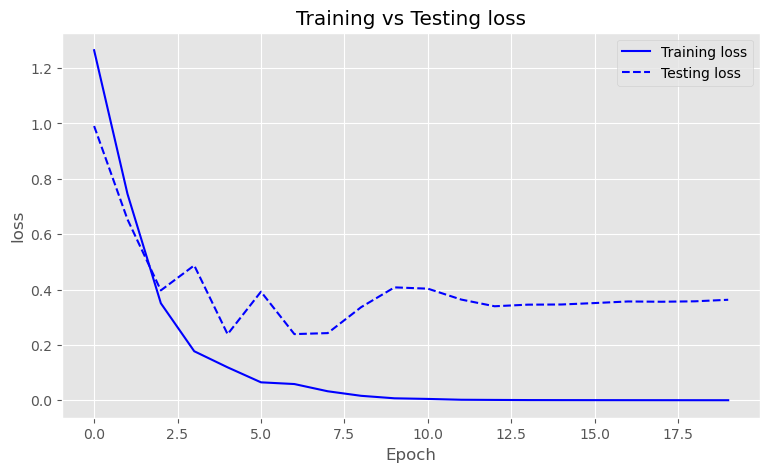

In [15]:
learning_curve(history, "loss")

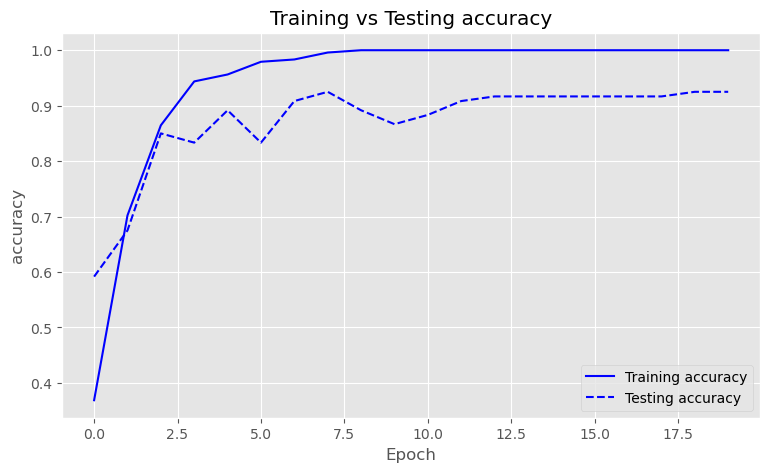

In [16]:
learning_curve(history, "accuracy")

### Data Augmentation

In [17]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    directory=data_dir,
    subset="training",
    class_mode='sparse',
    target_size=(img_height, img_width),
    shuffle=True,
    batch_size=batch_size)


valid_datagen = ImageDataGenerator(rescale=1./255, validation_split=.20)

valid_generator = valid_datagen.flow_from_directory(
    directory=data_dir,
    subset="validation",
    class_mode='sparse',
    target_size=(img_height, img_width),
    shuffle=True,
    batch_size=batch_size)

model = create_model()
# Compile the model
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
            optimizer=tf.keras.optimizers.Adam(),
            metrics=['accuracy'])

model.summary()

Found 600 images belonging to 3 classes.
Found 120 images belonging to 3 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)        18496     
                                      

In [18]:
# Fit the model
history = model.fit(train_generator,
        steps_per_epoch=len(train_generator),
        validation_data=valid_generator,
        validation_steps=len(valid_generator),
        epochs=30
        )

Epoch 1/30


2022-12-01 20:49:34.038731: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - ETA: 0s - loss: 1.3967 - accuracy: 0.4433

2022-12-01 20:49:38.989608: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - 6s 289ms/step - loss: 1.3967 - accuracy: 0.4433 - val_loss: 1.0265 - val_accuracy: 0.3917
Epoch 2/30
19/19 [==============================] - 5s 286ms/step - loss: 0.8911 - accuracy: 0.6967 - val_loss: 0.8750 - val_accuracy: 0.6083
Epoch 3/30
19/19 [==============================] - 5s 276ms/step - loss: 0.6255 - accuracy: 0.7700 - val_loss: 0.6283 - val_accuracy: 0.7833
Epoch 4/30
19/19 [==============================] - 5s 275ms/step - loss: 0.4706 - accuracy: 0.8133 - val_loss: 0.5368 - val_accuracy: 0.7333
Epoch 5/30
19/19 [==============================] - 5s 274ms/step - loss: 0.3994 - accuracy: 0.8300 - val_loss: 0.3538 - val_accuracy: 0.8583
Epoch 6/30
19/19 [==============================] - 5s 280ms/step - loss: 0.3315 - accuracy: 0.8550 - val_loss: 0.2585 - val_accuracy: 0.9250
Epoch 7/30
19/19 [==============================] - 5s 277ms/step - loss: 0.2733 - accuracy: 0.8917 - val_loss: 0.3096 - val_accuracy: 0.8750
Epoch 8/30
19/19 

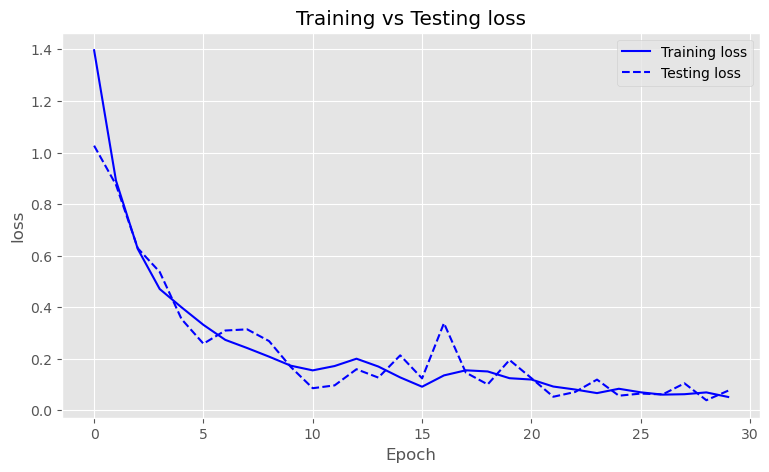

In [19]:
learning_curve(history, "loss")

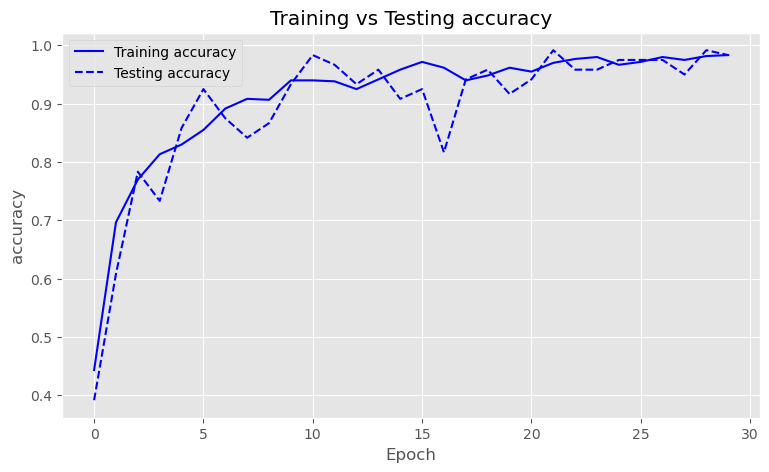

In [20]:
learning_curve(history, "accuracy")

### Load data and create `tf.Dataset()` using a Keras `utility`

In [21]:
# Create Training Dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 600 files belonging to 3 classes.
Using 480 files for training.


In [22]:
# Create Validation Dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 600 files belonging to 3 classes.
Using 120 files for validation.


In [23]:
class_names = train_ds.class_names
class_names

['driving_license', 'others', 'social_security']

### Optimize data loader pipeline with `tf.data.AUTOTUNE`

In [24]:
AUTOTUNE = tf.data.AUTOTUNE


train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Build the model

In [25]:
# Get the number of output classes
num_classes = len(class_names)

# Build the model

model = Sequential([
    keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    keras.layers.Conv2D(16, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes)

])

In [26]:
# Compile the model
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            optimizer=tf.keras.optimizers.Adam(),
            metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)       

In [27]:
# Fit the model
history = model.fit(train_ds,
        steps_per_epoch=len(train_ds),
        validation_data=val_ds,
        validation_steps=len(val_ds),
        epochs=20
        )

Epoch 1/20


2022-12-01 20:52:14.469257: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - ETA: 0s - loss: 1.4518 - accuracy: 0.3583

2022-12-01 20:52:15.575782: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 2s 49ms/step - loss: 1.4518 - accuracy: 0.3583 - val_loss: 1.0365 - val_accuracy: 0.5917
Epoch 2/20
15/15 [==============================] - 0s 23ms/step - loss: 0.8889 - accuracy: 0.6771 - val_loss: 0.6215 - val_accuracy: 0.8000
Epoch 3/20
15/15 [==============================] - 0s 23ms/step - loss: 0.4712 - accuracy: 0.8250 - val_loss: 0.3717 - val_accuracy: 0.8667
Epoch 4/20
15/15 [==============================] - 0s 23ms/step - loss: 0.3169 - accuracy: 0.8708 - val_loss: 0.3524 - val_accuracy: 0.8833
Epoch 5/20
15/15 [==============================] - 0s 23ms/step - loss: 0.1663 - accuracy: 0.9479 - val_loss: 0.2100 - val_accuracy: 0.9250
Epoch 6/20
15/15 [==============================] - 0s 23ms/step - loss: 0.1090 - accuracy: 0.9667 - val_loss: 0.1250 - val_accuracy: 0.9500
Epoch 7/20
15/15 [==============================] - 0s 23ms/step - loss: 0.1409 - accuracy: 0.9479 - val_loss: 0.1472 - val_accuracy: 0.9583
Epoch 8/20
15/15 [======

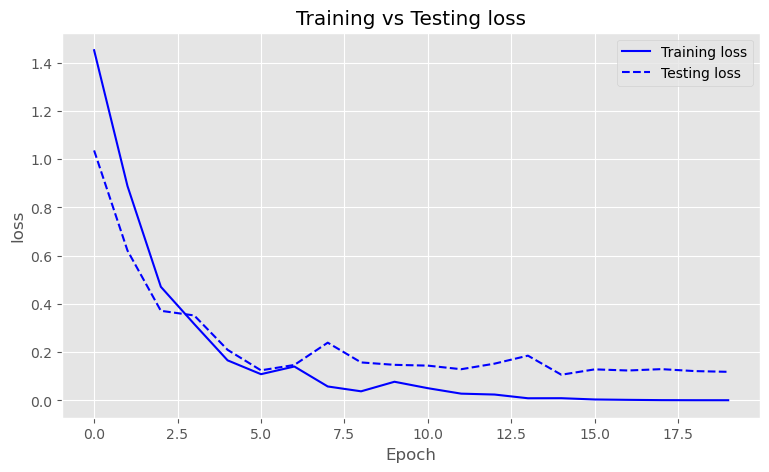

In [28]:
learning_curve(history, "loss")

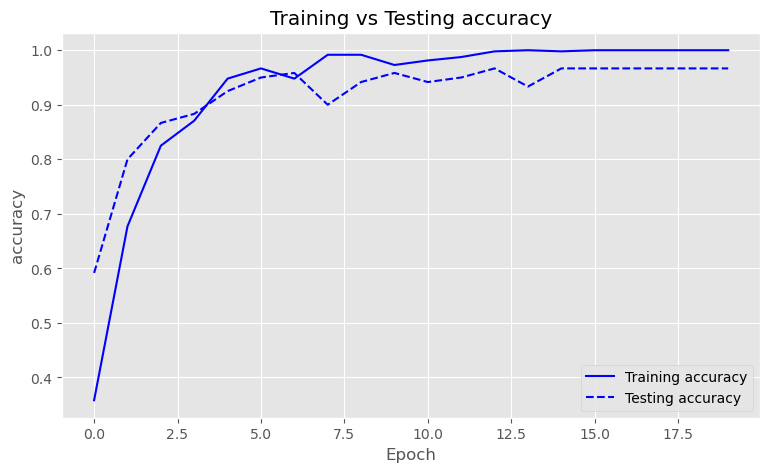

In [29]:
learning_curve(history, "accuracy")

In [30]:
data_augmentation = keras.Sequential(
  [
    keras.layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
  ]
)

In [31]:
model = Sequential([
  data_augmentation,
  keras.layers.Rescaling(1./255),
  keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Dropout(0.2),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(num_classes)
])

In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                 

In [33]:
# Fit the model
history = model.fit(train_ds,
        steps_per_epoch=len(train_ds),
        validation_data=val_ds,
        validation_steps=len(val_ds),
        epochs=30
        )

Epoch 1/30


2022-12-01 20:52:24.246445: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 9s 376ms/step - loss: 1.3681 - accuracy: 0.3625 - val_loss: 1.0165 - val_accuracy: 0.5167
Epoch 2/30


2022-12-01 20:52:31.963588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 5s 343ms/step - loss: 0.9526 - accuracy: 0.5875 - val_loss: 0.8480 - val_accuracy: 0.6083
Epoch 3/30
15/15 [==============================] - 5s 342ms/step - loss: 0.7239 - accuracy: 0.7229 - val_loss: 0.5815 - val_accuracy: 0.7750
Epoch 4/30
15/15 [==============================] - 5s 343ms/step - loss: 0.5004 - accuracy: 0.7896 - val_loss: 0.4337 - val_accuracy: 0.8500
Epoch 5/30
15/15 [==============================] - 5s 340ms/step - loss: 0.3393 - accuracy: 0.8688 - val_loss: 0.3166 - val_accuracy: 0.8833
Epoch 6/30
15/15 [==============================] - 5s 344ms/step - loss: 0.2848 - accuracy: 0.8896 - val_loss: 1.0141 - val_accuracy: 0.7083
Epoch 7/30
15/15 [==============================] - 5s 336ms/step - loss: 0.3184 - accuracy: 0.8729 - val_loss: 0.2736 - val_accuracy: 0.9167
Epoch 8/30
15/15 [==============================] - 5s 335ms/step - loss: 0.2345 - accuracy: 0.9208 - val_loss: 0.2345 - val_accuracy: 0.9167
Epoch 9/30
15/15 

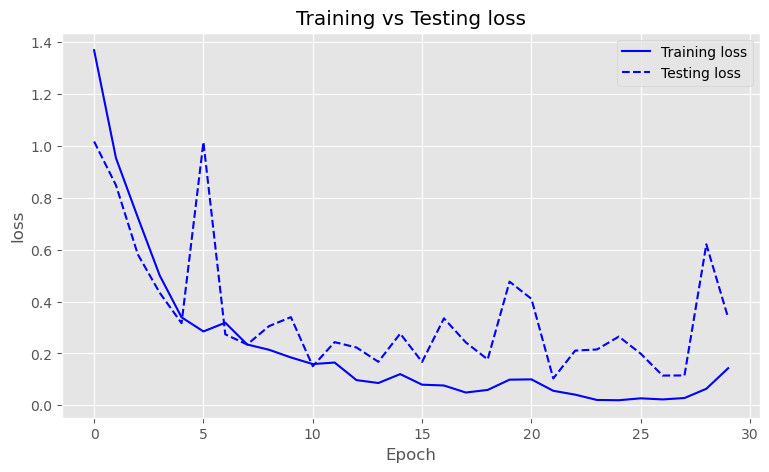

In [34]:
learning_curve(history, "loss")


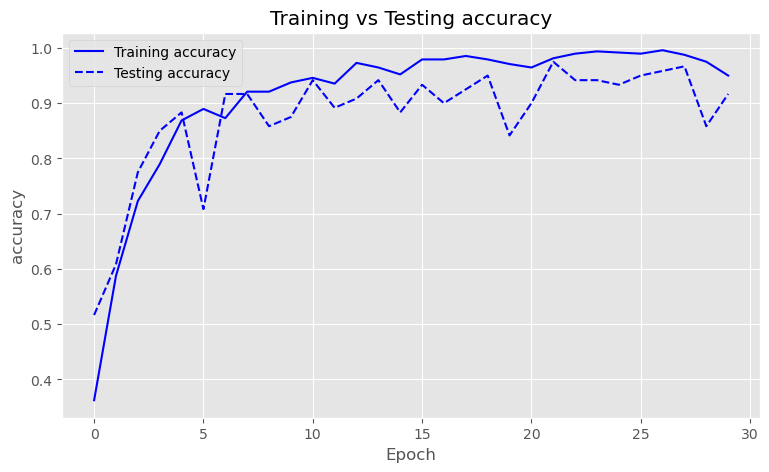

In [35]:
learning_curve(history, "accuracy")